<a href="https://colab.research.google.com/github/g1moon/Grapheme-Classification/blob/master/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sat Feb 22 10:03:17 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime → "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.4 gigabytes of available RAM

You are using a high-RAM runtime!


In [0]:
#<img src="../images/python_logo.svg" />


In [0]:
# 목록 확인
# 파일이 확인이 되면 아래 코드로 구글 드라이브에 있는 파일을 읽어봅니다. 
#구글 드라이브에서 “내 드라이브”의 경로는 “/gdrive/My Drive/”의 경로이기 때문에
# 내 드라이브에 있는 파일을 선택할 경우 파일명 앞에 “/gdrive/My Drive/”을 붙입니다.
!ls "/gdrive/My Drive"


'제목 없는 폴더'
'제목 없는 문서 (1).gdoc'
 표준정의서_201550031_조기문_기말과제.gsheet
'데이터 정보검색과 활용-2019_1학기_에세이.gdoc'
'제목 없는 문서 (2).gdoc'
'제목 없는 문서 (3).gdoc'
'제목 없는 문서 (4).gdoc'
'제목 없는 문서 (5).gdoc'
'제목 없는 문서 (6).gdoc'
'제목 없는 문서 (7).gdoc'
 AI대학원.gsheet
'AI대학원의 사본.gsheet'
'Colab Notebooks'
 DaFarm_project
 data_form.gsheet
 db기초.gdoc
'제목 없는 문서.gdoc'
 치팅.gdoc
'머신러닝 인터뷰 준비.gdoc'
 kaggle
'조기문_K프로젝트 사업_신청관련.pdf'
'ML Algorithm.gslides'
 식스시그마_최종.pdf
 다팜최종발표.pdf
'req_form (1).gsheet'
'req_form (2).gsheet'
 req_form.gsheet
 SW학습멘토신청서_201550031_조기문


```python
import numpy as np

dataset = np.loadtxt("/gdrive/My Drive/pima-indians-diabetes.csv", delimiter=",")

print(dataset)
```

# Introduction
<div class="alert alert-block alert-warning">
<strong><font color="yellow" size="6em"> Introduction </font></strong><br>

Bengali is the 5th most spoken language in the world with hundreds of million of speakers. Optical character recognition is particularly challenging for Bengali. While Bengali has 49 letters (to be more specific 11 vowels and 38 consonants) in its alphabet, there are also 18 potential diacritics, or accents. This means that there are many more graphemes, or the smallest units in a written language. The added complexity results in ~13,000 different grapheme variations (compared to English’s 250 graphemic units).

Bangladesh-based non-profit Bengali.AI is focused on helping to solve this problem. They build and release crowdsourced, metadata-rich datasets and open source them through research competitions. Through this work, Bengali.AI hopes to democratize and accelerate research in Bengali language technologies and to promote machine learning education.

For this competition, we are given the image of a handwritten Bengali grapheme and are challenged to separately classify three constituent elements in the image: grapheme root, vowel diacritics, and consonant diacritics.

In [0]:
!ls /gdrive/My\ Drive/kaggle/bengaliai-cv19/

In [0]:
import os
import pandas as pd
import numpy as np
import PIL.Image
import time
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline 



In [0]:
for dirname, _, filenames in os.walk('/gdrive/My Drive/kaggle/bengaliai-cv19/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/gdrive/My Drive/kaggle/bengaliai-cv19/test.csv
/gdrive/My Drive/kaggle/bengaliai-cv19/sample_submission.csv
/gdrive/My Drive/kaggle/bengaliai-cv19/class_map.csv
/gdrive/My Drive/kaggle/bengaliai-cv19/train_image_data_2.parquet
/gdrive/My Drive/kaggle/bengaliai-cv19/train_image_data_3.parquet
/gdrive/My Drive/kaggle/bengaliai-cv19/train_image_data_1.parquet
/gdrive/My Drive/kaggle/bengaliai-cv19/train_image_data_0.parquet
/gdrive/My Drive/kaggle/bengaliai-cv19/test_image_data_1.parquet
/gdrive/My Drive/kaggle/bengaliai-cv19/test_image_data_0.parquet
/gdrive/My Drive/kaggle/bengaliai-cv19/train.csv
/gdrive/My Drive/kaggle/bengaliai-cv19/test_image_data_2.parquet
/gdrive/My Drive/kaggle/bengaliai-cv19/test_image_data_3.parquet
/gdrive/My Drive/kaggle/bengaliai-cv19/.ipynb_checkpoints/class_map-checkpoint.csv
/gdrive/My Drive/kaggle/bengaliai-cv19/.ipynb_checkpoints/train-checkpoint.csv


# Data exploration
<div class="alert alert-block alert-warning">
<strong><font color="yellow" size="6em"> Data exploration </font></strong><br>

In [0]:
DATA_FOLDER = '/gdrive/My Drive/kaggle/bengaliai-cv19/'
train_df = pd.read_csv(os.path.join(DATA_FOLDER, 'train.csv'))
train_df.head()


,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0,15,9,5,ক্ট্রো
1,Train_1,159,0,0,হ
2,Train_2,22,3,5,খ্রী
3,Train_3,53,2,2,র্টি
4,Train_4,71,9,5,থ্রো


In [0]:
train_df.shape

(200840, 5)

In [0]:
test_df = pd.read_csv(os.path.join(DATA_FOLDER, 'test.csv'))
test_df.head()

,row_id,image_id,component
0,Test_0_consonant_diacritic,Test_0,consonant_diacritic
1,Test_0_grapheme_root,Test_0,grapheme_root
2,Test_0_vowel_diacritic,Test_0,vowel_diacritic
3,Test_1_consonant_diacritic,Test_1,consonant_diacritic
4,Test_1_grapheme_root,Test_1,grapheme_root


In [0]:
test_df.shape

(36, 3)

In [0]:
class_map_df = pd.read_csv(os.path.join(DATA_FOLDER, 'class_map.csv'))
class_map_df.head()

,component_type,label,component
0,grapheme_root,0,ং
1,grapheme_root,1,ঃ
2,grapheme_root,2,অ
3,grapheme_root,3,আ
4,grapheme_root,4,ই


In [0]:
class_map_df.head()


,component_type,label,component
0,grapheme_root,0,ং
1,grapheme_root,1,ঃ
2,grapheme_root,2,অ
3,grapheme_root,3,আ
4,grapheme_root,4,ই


In [0]:
sample_submission_df = pd.read_csv(os.path.join(DATA_FOLDER, 'sample_submission.csv'))
sample_submission_df.head()
print(sample_submission_df.head())

                       row_id  target
0  Test_0_consonant_diacritic       0
1        Test_0_grapheme_root       0
2      Test_0_vowel_diacritic       0
3  Test_1_consonant_diacritic       0
4        Test_1_grapheme_root       0


- we follow how with the parquet files. 
- we will read only two of the parquet files for now

- fist train file 

In [0]:
start_time = time.time()
train_0_df = pd.read_parquet(os.path.join(DATA_FOLDER, 'train_image_data_0.parquet'))
print(f"`train_image_data_0` read in {time.time()-start_time} sec.") 
#{round(time.time() - start_time,2=)}

`train_image_data_0` read in 18.687854528427124 sec.


In [0]:
train_0_df.shape

(50210, 32333)

In [0]:
train_0_df.head()

,image_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,32292,32293,32294,32295,32296,32297,32298,32299,32300,32301,32302,32303,32304,32305,32306,32307,32308,32309,32310,32311,32312,32313,32314,32315,32316,32317,32318,32319,32320,32321,32322,32323,32324,32325,32326,32327,32328,32329,32330,32331
0,Train_0,254,253,252,253,251,252,253,251,251,253,254,253,253,253,254,253,252,253,253,253,253,252,252,253,253,252,252,253,252,252,252,253,254,253,253,252,252,252,253,...,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,251
1,Train_1,251,244,238,245,248,246,246,247,251,252,250,250,246,249,248,250,249,251,252,253,253,253,253,253,253,253,250,249,251,252,251,251,251,251,252,253,251,250,252,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,254
2,Train_2,251,250,249,250,249,245,247,252,252,252,253,252,252,251,250,251,253,254,251,251,252,252,253,253,252,251,251,249,251,252,252,253,252,251,251,251,250,250,252,...,253,253,252,252,252,253,253,253,253,253,252,251,251,250,250,250,251,251,251,250,250,250,251,252,253,253,253,253,254,254,254,253,252,252,253,253,253,253,251,249
3,Train_3,247,247,249,253,253,252,251,251,250,250,251,250,249,251,251,251,250,252,251,245,245,251,252,251,252,252,250,249,250,251,250,249,250,251,252,253,252,252,252,...,253,252,252,254,253,253,254,253,252,253,254,253,252,253,254,254,254,254,254,254,254,254,253,252,253,254,253,252,253,254,254,254,254,254,254,253,253,252,251,252
4,Train_4,249,248,246,246,248,244,242,242,229,225,231,229,229,228,221,224,226,221,221,220,217,217,218,219,222,224,214,218,227,227,227,228,224,231,235,235,233,212,183,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255


In [0]:
#'train_image_data_1.parquet'
start_time = time.time()
train_1_df = pd.read_parquet(os.path.join(DATA_FOLDER,'train_image_data_1.parquet'))
print(f"`train_image_data_1` read in {round(time.time()-start_time,2)} sec.")  

`train_image_data_1` read in 20.48 sec.


In [0]:
train_1_df.shape
train_1_df.head()

,image_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,32292,32293,32294,32295,32296,32297,32298,32299,32300,32301,32302,32303,32304,32305,32306,32307,32308,32309,32310,32311,32312,32313,32314,32315,32316,32317,32318,32319,32320,32321,32322,32323,32324,32325,32326,32327,32328,32329,32330,32331
0,Train_50210,246,253,251,250,249,252,246,250,250,247,250,247,245,246,250,250,243,251,250,244,247,251,248,247,250,247,245,248,250,248,249,248,249,248,244,249,248,247,248,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,254,253
1,Train_50211,250,245,241,244,249,253,253,254,254,254,254,254,254,254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,254,254,254,254,254,253,253,254,254,254,253,254,253,254,255,255,255,255,255,255,255,254,254,255,255,254,254,254,254,255,254,254,253,253,253,254,255,253,253,254
2,Train_50212,248,248,249,249,250,251,250,250,249,250,252,251,250,251,251,247,248,250,246,243,248,249,248,247,246,244,246,247,247,247,246,249,248,240,245,249,248,251,252,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
3,Train_50213,253,252,250,252,252,251,252,252,252,251,249,252,251,251,250,247,251,249,249,250,250,249,250,251,249,250,251,250,250,250,251,250,250,251,250,251,252,251,251,...,253,253,253,254,254,254,254,254,254,254,254,255,254,254,254,254,255,255,255,254,253,253,253,253,253,252,252,251,251,252,252,252,253,252,252,251,250,251,251,253
4,Train_50214,250,252,252,250,250,252,253,254,254,254,253,253,252,253,253,253,251,250,252,254,254,252,252,251,250,252,253,252,250,249,252,252,252,252,252,250,250,251,252,...,250,248,250,251,252,251,248,245,248,251,252,251,250,250,251,251,251,251,251,251,250,250,250,250,251,252,253,252,250,250,251,252,251,250,251,252,252,252,252,252


- each `train_image_data_x` (x=0...3) contains __50210__ rows and __32333__ columns 
- size of each iamge being __(137,236)__ 
- totally there are __50210 x 4 = 200850__ rows in the training set

- we also read one of the test files

In [0]:
print('Train : unique grapheme roots: {}'.format(train_df.grapheme_root.nunique()))
print(f"Train: unique vowel diacritics: {train_df.vowel_diacritic.nunique()}")
print(f"Train: unique consonant diacritics: {train_df.consonant_diacritic.nunique()}")
print(f"Train: total unique elements: {train_df.grapheme_root.nunique() + train_df.vowel_diacritic.nunique() + train_df.consonant_diacritic.nunique()}")
print('\n')
print(f"Class map: unique elements: \n{class_map_df.component_type.value_counts()} \n")
#???
print(f"Total combinations: {pd.DataFrame(train_df.groupby(['grapheme_root', 'vowel_diacritic', 'consonant_diacritic'])).shape[0]}")

Train : unique grapheme roots: 168
Train: unique vowel diacritics: 11
Train: unique consonant diacritics: 7
Train: total unique elements: 186


Class map: unique elements: 
grapheme_root          168
vowel_diacritic         11
consonant_diacritic      7
Name: component_type, dtype: int64 

Total combinations: 1292


In [0]:
train_df.head()

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0,15,9,5,ক্ট্রো
1,Train_1,159,0,0,হ
2,Train_2,22,3,5,খ্রী
3,Train_3,53,2,2,র্টি
4,Train_4,71,9,5,থ্রো


## Data distribution 

<div class="alert alert-block alert-warning">
<strong><font color="pink" size="6em"> Data distribution  </font></strong><br>

- let's start by viewing each grapheme
- les's show the grapheme roots first

In [0]:
print(class_map_df.component_type.unique())
print(class_map_df.component_type.nunique())
class_map_df.head()

['grapheme_root' 'vowel_diacritic' 'consonant_diacritic']
3


,component_type,label,component
0,grapheme_root,0,ং
1,grapheme_root,1,ঃ
2,grapheme_root,2,অ
3,grapheme_root,3,আ
4,grapheme_root,4,ই


In [0]:
cm_gr = class_map_df.loc[(class_map_df.component_type == 'grapheme_root'), 'component'].values
cm_vd = class_map_df.loc[(class_map_df.component_type== 'vowel_diacritic'), 'component'].values
cm_cd = class_map_df.loc[(class_map_df.component_type== 'consonant_diacritic'), 'component'].values

print(f"grapheme root:\n{15*'-'}\n{cm_gr}\n\n vowel discritic:\n{18*'-'}\n{cm_vd}\n\n consonant diacritic:\n{20*'-'}\n {cm_cd}")

grapheme root:
---------------
['ং' 'ঃ' 'অ' 'আ' 'ই' 'ঈ' 'উ' 'ঊ' 'ঋ' 'এ' 'ঐ' 'ও' 'ঔ' 'ক' 'ক্ক' 'ক্ট' 'ক্ত'
 'ক্ল' 'ক্ষ' 'ক্ষ্ণ' 'ক্ষ্ম' 'ক্স' 'খ' 'গ' 'গ্ধ' 'গ্ন' 'গ্ব' 'গ্ম' 'গ্ল'
 'ঘ' 'ঘ্ন' 'ঙ' 'ঙ্ক' 'ঙ্ক্ত' 'ঙ্ক্ষ' 'ঙ্খ' 'ঙ্গ' 'ঙ্ঘ' 'চ' 'চ্চ' 'চ্ছ'
 'চ্ছ্ব' 'ছ' 'জ' 'জ্জ' 'জ্জ্ব' 'জ্ঞ' 'জ্ব' 'ঝ' 'ঞ' 'ঞ্চ' 'ঞ্ছ' 'ঞ্জ' 'ট'
 'ট্ট' 'ঠ' 'ড' 'ড্ড' 'ঢ' 'ণ' 'ণ্ট' 'ণ্ঠ' 'ণ্ড' 'ণ্ণ' 'ত' 'ত্ত' 'ত্ত্ব'
 'ত্থ' 'ত্ন' 'ত্ব' 'ত্ম' 'থ' 'দ' 'দ্ঘ' 'দ্দ' 'দ্ধ' 'দ্ব' 'দ্ভ' 'দ্ম' 'ধ'
 'ধ্ব' 'ন' 'ন্জ' 'ন্ট' 'ন্ঠ' 'ন্ড' 'ন্ত' 'ন্ত্ব' 'ন্থ' 'ন্দ' 'ন্দ্ব' 'ন্ধ'
 'ন্ন' 'ন্ব' 'ন্ম' 'ন্স' 'প' 'প্ট' 'প্ত' 'প্ন' 'প্প' 'প্ল' 'প্স' 'ফ' 'ফ্ট'
 'ফ্ফ' 'ফ্ল' 'ব' 'ব্জ' 'ব্দ' 'ব্ধ' 'ব্ব' 'ব্ল' 'ভ' 'ভ্ল' 'ম' 'ম্ন' 'ম্প'
 'ম্ব' 'ম্ভ' 'ম্ম' 'ম্ল' 'য' 'র' 'ল' 'ল্ক' 'ল্গ' 'ল্ট' 'ল্ড' 'ল্প' 'ল্ব'
 'ল্ম' 'ল্ল' 'শ' 'শ্চ' 'শ্ন' 'শ্ব' 'শ্ম' 'শ্ল' 'ষ' 'ষ্ক' 'ষ্ট' 'ষ্ঠ' 'ষ্ণ'
 'ষ্প' 'ষ্ফ' 'ষ্ম' 'স' 'স্ক' 'স্ট' 'স্ত' 'স্থ' 'স্ন' 'স্প' 'স্ফ' 'স্ব'
 'স্ম' 'স্ল' 'স্স' 'হ' 'হ্ন' 'হ্ব' 'হ্ম' 'হ্ল' 'ৎ' 'ড়' 'ঢ়' 'য়']

 vowel discritic:
--------

- lets follow by investigating the most frequent values
- most frequent train values

In [0]:
train_df.nunique()

image_id               200840
grapheme_root             168
vowel_diacritic            11
consonant_diacritic         7
grapheme                 1295
dtype: int64

In [0]:
def most_frequent_values(data):
    #totla =  data count 시리즈로 생성 
    total = data.count()
    tt = pd.DataFrame(total) #데이터 프레임으로 바꿔주고(시리즈->df)
    tt.columns = ['Total']
    items = []
    vals = []


    for col in data.columns:
        #value_counts()를 하면 "index" - "value나타난수" 로
        #나타나는데 가장 많은게 위로 올라가므로 
        #가장 많이 나타난 index와 그의 value_count를 itm, val에 할당

        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))


In [0]:
most_frequent_values(train_df)

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
Total,200840,200840,200840,200840,200840
Most frequent item,Train_166512,72,0,0,য়ে
Frequence,1,5736,41508,125278,283
Percent from total,0,2.856,20.667,62.377,0.141


<strong><font color="red" size="6em"> @@@@@@@@@@@@@@  </font></strong>


In [0]:
total = train_df.count()
tt = pd.DataFrame(total) #데이터 프레임으로 바꿔주고(시리즈->df)
tt.columns = ['Total']
tt

,Total
image_id,200840
grapheme_root,200840
vowel_diacritic,200840
consonant_diacritic,200840
grapheme,200840


<strong><font color="red" size="6em"> @@@@@@@@@@@@@@  </font></strong>

In [0]:
train_df.head()

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0,15,9,5,ক্ট্রো
1,Train_1,159,0,0,হ
2,Train_2,22,3,5,খ্রী
3,Train_3,53,2,2,র্টি
4,Train_4,71,9,5,থ্রো


In [0]:
most_frequent_values(train_df)


------------------------------
Index(['Train_166512', 'Train_106350', 'Train_21947', 'Train_193706',
       'Train_185306', 'Train_146216', 'Train_142251', 'Train_31085',
       'Train_198429', 'Train_51425',
       ...
       'Train_43934', 'Train_113599', 'Train_1847', 'Train_108265',
       'Train_109469', 'Train_36122', 'Train_122973', 'Train_30978',
       'Train_76518', 'Train_127578'],
      dtype='object', length=200840) 

 [1 1 1 ... 1 1 1]
------------------------------
------------------------------
Int64Index([ 72,  64,  13, 107,  23,  96, 113, 147, 133, 115,
            ...
             63,   0,  12,   1,  45, 130, 158, 102,  33,  73],
           dtype='int64', length=168) 

 [5736 5596 5420 5321 5149 4926 4395 4392 4374 4015 3690 3630 3461 3458
 3438 3354 3281 2961 2936 2780 2688 2402 2339 2313 2313 2312 2311 2188
 2094 2073 1957 1936 1746 1723 1680 1633 1585 1553 1539 1537 1531 1518
 1418 1376 1365 1363 1285 1248 1207 1142 1139 1127 1127 1127 1116 1083
 1083 1067 1057 10

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
Total,200840,200840,200840,200840,200840
Most frequent item,Train_166512,72,0,0,য়ে
Frequence,1,5736,41508,125278,283
Percent from total,0,2.856,20.667,62.377,0.141


In [130]:
most_frequent_values(test_df)


,row_id,image_id,component
Total,36,36,36
Most frequent item,Test_10_grapheme_root,Test_10,grapheme_root
Frequence,1,3,12
Percent from total,2.778,8.333,33.333


- let's look now to the distribution of class values.


In [0]:
def plot_count(feature, title, df, size=1):
    '''
    Plot count of classes of selected feature; feature is a categorical value
    param: feature - the feature for which we present the distribution of classes
    param: title - title to show in the plot
    param: df - dataframe 
    param: size - size (from 1 to n), multiplied with 4 - size of plot
    '''
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))

    if(size > 2):
        plt.xticks(rotation=90, size=8)
        
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show() 

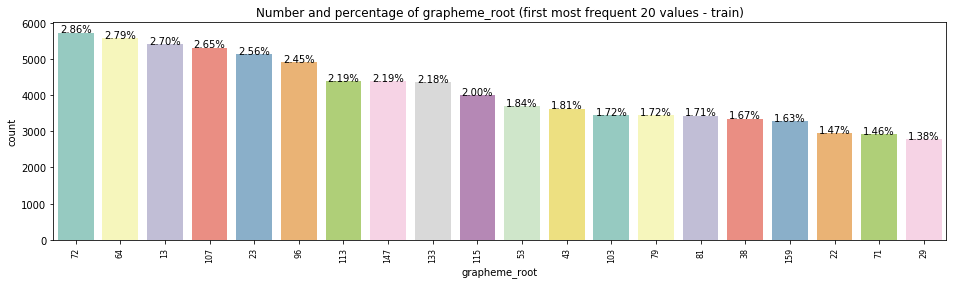

In [129]:
plot_count('grapheme_root', 'grapheme_root (first most frequent 20 values - train)', train_df, size=4)


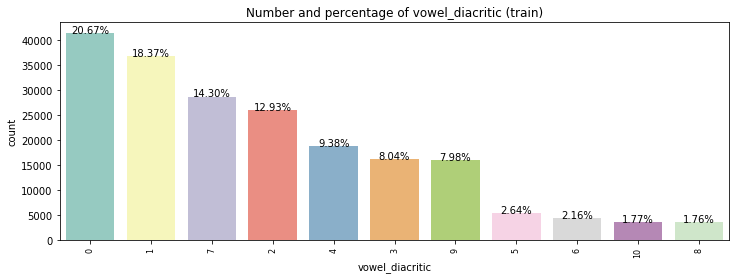

In [131]:
plot_count('vowel_diacritic', 'vowel_diacritic (train)', train_df, size=3)

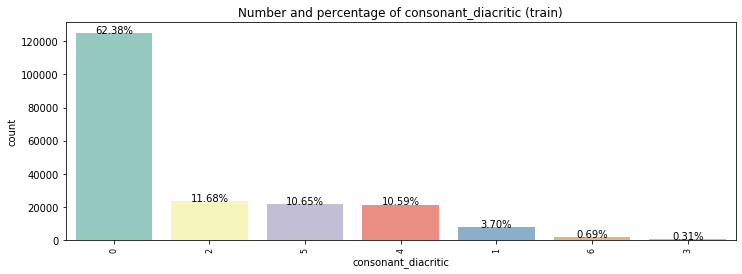

In [132]:
plot_count('consonant_diacritic', 'consonant_diacritic (train)', train_df, size=3)


- lets show now distribution of combination of features.
- we create a function to show a heatmap

In [0]:
def plot_count_heatmap(feature1, feature2, df, size=1):  
    '''
    Heatmap showing the distribution of couple of features
    param: feature1 - ex: vowel_diacritic
    param: feature2 - ex: consonant_diacritic
    '''
    tmp = train_df.groupby([feature1, feature2])['grapheme'].count()
    df = tmp.reset_index()
    df
    
    df_m = df.pivot(feature1, feature2, "grapheme")
    f, ax = plt.subplots(figsize=(9, size * 4))
    sns.heatmap(df_m, annot=True, fmt='3.0f', linewidths=.5, ax=ax)

    

<strong><font color ='red' size = '5em'> @@@@@@@@@@@@@@@@@@@s </font></strong>

---



In [152]:
train_df.head(2)

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0,15,9,5,ক্ট্রো
1,Train_1,159,0,0,হ


In [155]:
tmp = train_df.groupby(['vowel_diacritic', 'consonant_diacritic']).count()
print(tmp.head(), type(tmp))
df = tmp.reset_index()
df.head(3)

                                     image_id  grapheme_root  grapheme
vowel_diacritic consonant_diacritic                                   
0               0                       23960          23960     23960
                1                         768            768       768
                2                        6262           6262      6262
                3                         619            619       619
                4                        5413           5413      5413 <class 'pandas.core.frame.DataFrame'>


,vowel_diacritic,consonant_diacritic,image_id,grapheme_root,grapheme
0,0,0,23960,23960,23960
1,0,1,768,768,768
2,0,2,6262,6262,6262


In [154]:
tmp.head(2)

image_id  grapheme_root  grapheme
vowel_diacritic consonant_diacritic                                   
0               0                       23960          23960     23960
                1                         768            768       768

In [0]:
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
    df_m = df.pivot(feature1, feature2, "grapheme")
    f, ax = plt.subplots(figsize=(9, size * 4))
    sns.heatmap(df_m, annot=True, fmt='3.0f', linewidths=.5, ax=ax)




In [166]:
df_m = df.pivot('vowel_diacritic', 'consonant_diacritic','grapheme')
df_m.head()

consonant_diacritic,0,1,2,3,4,5,6
vowel_diacritic,,,,,,,
0,23960.0,768.0,6262.0,619.0,5413.0,4180.0,306.0
1,18799.0,2843.0,3838.0,NaN,6573.0,3752.0,1081.0
2,17449.0,464.0,3764.0,NaN,1255.0,3035.0,NaN
3,11391.0,NaN,2290.0,NaN,NaN,2471.0,NaN
4,11832.0,1215.0,1563.0,NaN,2206.0,2032.0,NaN


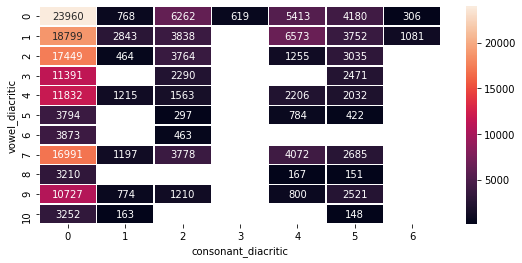

In [176]:
size = 1 
f, ax = plt.subplots(figsize = (9, size *4))
#annot => 번호표시
#fmt : string, optional
    #String formatting code to use when adding annotations.

sns.heatmap(df_m, annot=True, fmt='3.0f', linewidths=.5, ax=ax)

<strong><font color ='red' size = '5em'> @@@@@@@@@@@@@@@@@@@ </font></strong>

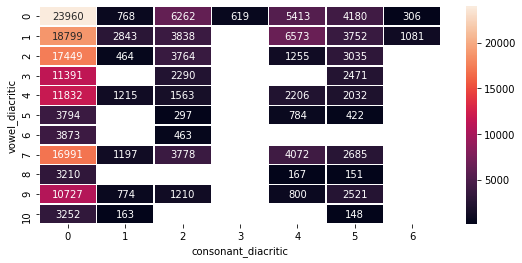

In [134]:
plot_count_heatmap('vowel_diacritic','consonant_diacritic', train_df)

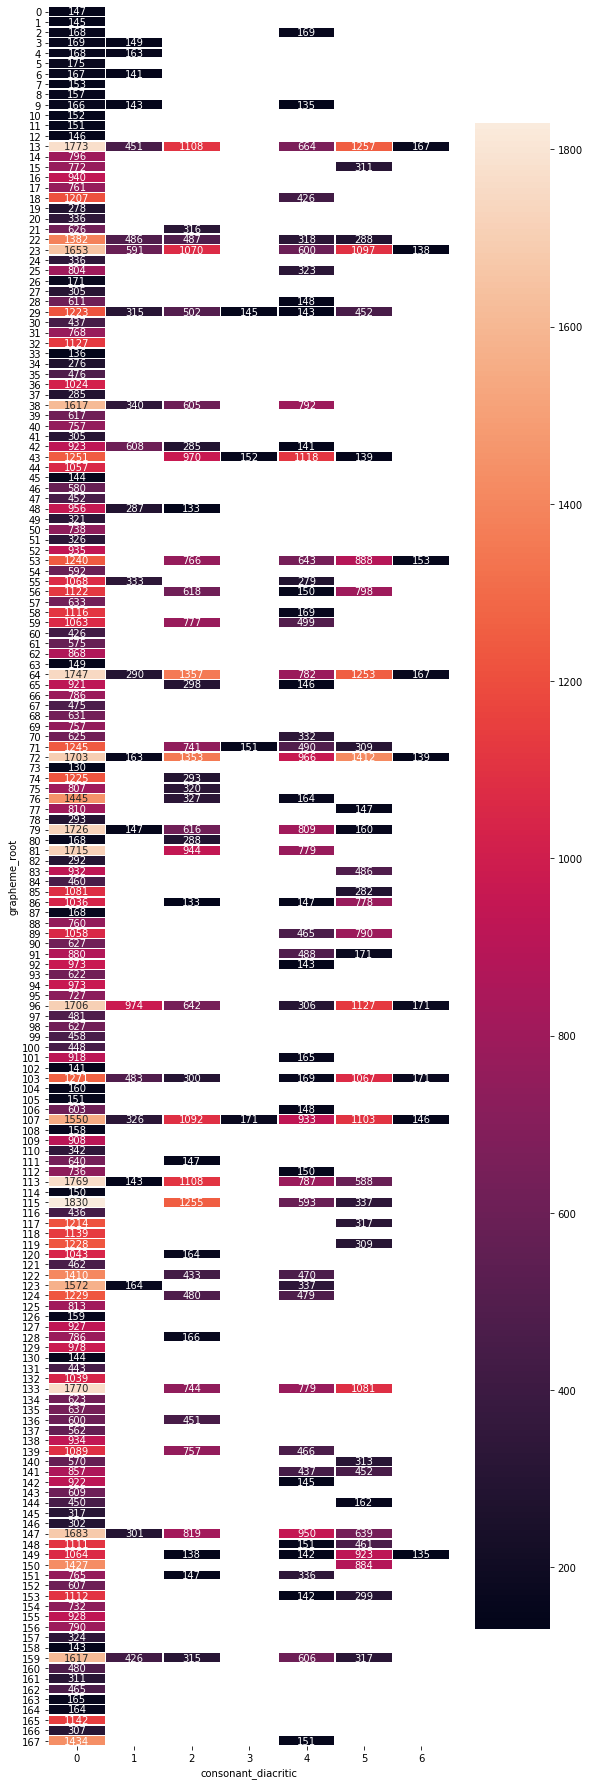

In [135]:
plot_count_heatmap('grapheme_root','consonant_diacritic', train_df, size=8)


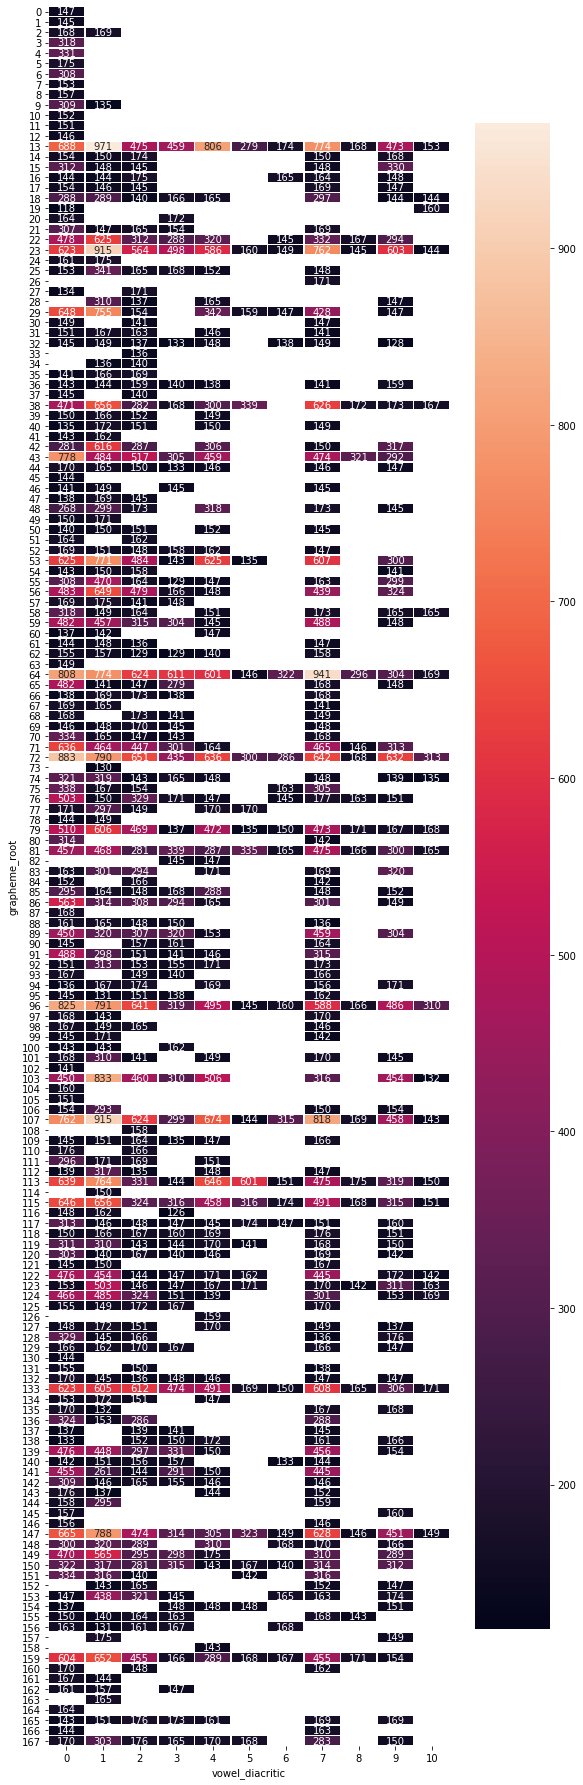

In [136]:
plot_count_heatmap('grapheme_root','vowel_diacritic', train_df, size=8)


## Inspect grapheme images
<strong><font color='yellow' size = '6em'> Inspect graphempe images </font></strong>

- we define a function to show a sample of (size * size) handwrittem graphems

In [0]:
def display_image_from_data(data_df, size=5):
    '''
    Display grapheme images from sample data
    param: data_df - sample of data
    param: size - sqrt(sample size of data)
    '''
    plt.figure()
    #
    fig, ax = plt.subplots(size,size,figsize=(12,12))
    # we show grapheme images for a selection of size x size samples
    for i, index in enumerate(data_df.index):
        image_id = data_df.iloc[i]['image_id']
        flattened_image = data_df.iloc[i].drop('image_id').values.astype(np.uint8)
        unpacked_image = PIL.Image.fromarray(flattened_image.reshape(137, 236))

        ax[i//size, i%size].imshow(unpacked_image)
        ax[i//size, i%size].set_title(image_id)
        ax[i//size, i%size].axis('on')


<Figure size 432x288 with 0 Axes>

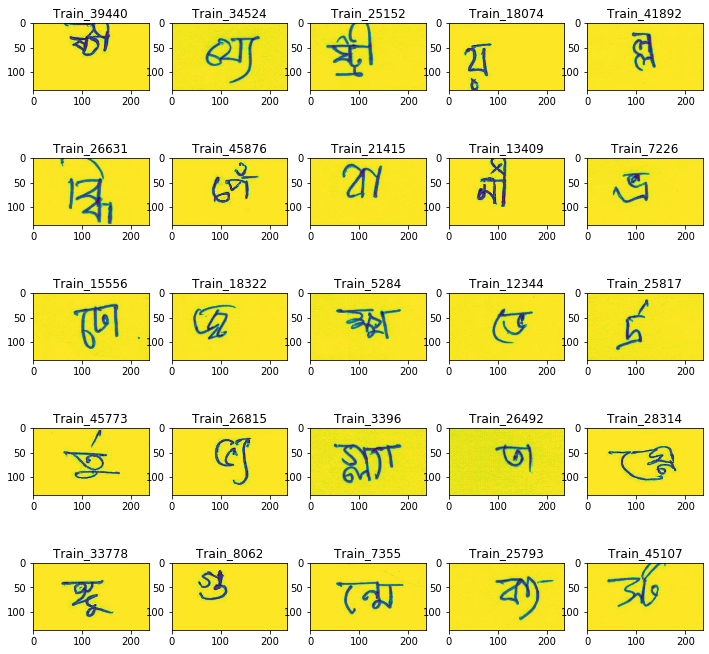

In [184]:
display_image_from_data(train_0_df.sample(25))
